In [1]:
import tensorflow as tf
from tensorflow import keras
import keras_cv
from keras import layers
from keras.models import Sequential
from keras.optimizers import Adam

ModuleNotFoundError: No module named 'keras_cv'

In [2]:
import os
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'

In [3]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

2023-08-16 17:47:30.038210: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-16 17:47:30.066594: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-16 17:47:30.066846: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [4]:
train_data = tf.keras.utils.image_dataset_from_directory(
    '../earthshots-data/tiled', # update this
    validation_split = .2,
    subset='training',
    seed=0,
    image_size = (224, 224),
    batch_size=16,
)

val_data = tf.keras.utils.image_dataset_from_directory(
    '../earthshots-data/tiled',
    validation_split=.2,
    subset='validation',
    seed=0,
    image_size=(224,224),
    batch_size=16,
)

Found 31242 files belonging to 2 classes.
Using 24994 files for training.


2023-08-16 17:47:31.479198: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-16 17:47:31.479611: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-16 17:47:31.479848: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Found 31242 files belonging to 2 classes.
Using 6248 files for validation.


In [5]:
""" model = tf.keras.applications.EfficientNetV2L(
    include_top=True,
    weights=None,
    input_shape=(224,224,3),
    classes=1,
    classifier_activation="sigmoid",
    include_preprocessing=True
) """

model = tf.keras.

In [6]:
initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)


optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision()])

In [9]:
history = model.fit(
    x=train_data,
    validation_data = val_data,
    epochs = 10
)

Epoch 1/10
1563/1563 [==============================] - 480s 307ms/step - loss: 0.6612 - accuracy: 0.6659 - precision: 0.5659 - val_loss: 0.6765 - val_accuracy: 0.7106 - val_precision: 0.7345
Epoch 2/10
1563/1563 [==============================] - 474s 303ms/step - loss: 0.6640 - accuracy: 0.6860 - precision: 0.6177 - val_loss: 0.5620 - val_accuracy: 0.7329 - val_precision: 0.7584
Epoch 3/10
1563/1563 [==============================] - 474s 303ms/step - loss: 0.6484 - accuracy: 0.6817 - precision: 0.5934 - val_loss: 0.5436 - val_accuracy: 0.7492 - val_precision: 0.7374
Epoch 4/10
1563/1563 [==============================] - 474s 303ms/step - loss: 0.6344 - accuracy: 0.6889 - precision: 0.6085 - val_loss: 0.5700 - val_accuracy: 0.7414 - val_precision: 0.7891
Epoch 5/10
1563/1563 [==============================] - 474s 303ms/step - loss: 0.5791 - accuracy: 0.7315 - precision: 0.6766 - val_loss: 0.4824 - val_accuracy: 0.7823 - val_precision: 0.8187
Epoch 6/10
1563/1563 [==================

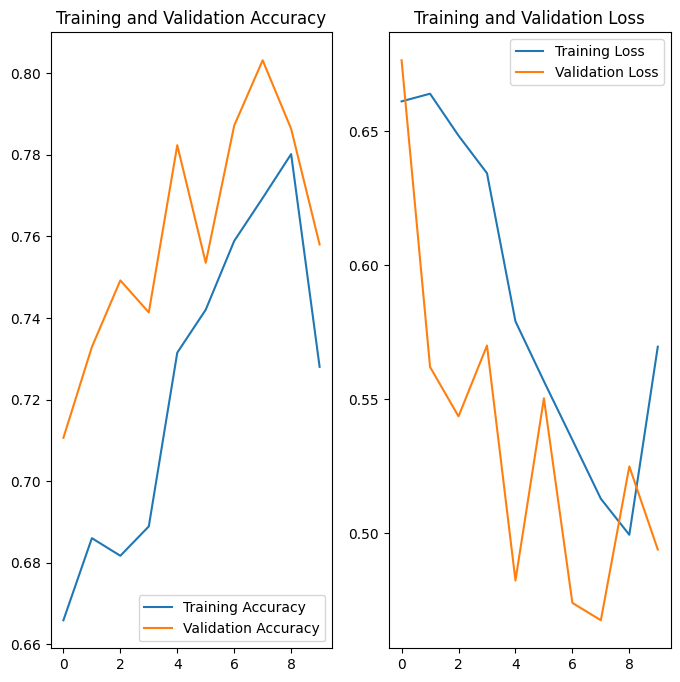

In [10]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
model.save('airfields-effnetV2L-0.0.keras')